In [1]:
# importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import cv2

## Question 1 (Intensity transformation)

#

In [2]:
# creating transformation points
pts = np.array([(50, 50), (50, 100), (150, 255), (150, 150)])

t1 = np.linspace(0, pts[0, 1], pts[0, 0] + 1 - 0).astype(np.uint8)
t2 = np.linspace(pts[0, 1] + 1, pts[1, 1], pts[1, 0] - pts[0, 0]).astype(np.uint8)
t3 = np.linspace(pts[1, 1] + 1, pts[2, 1], pts[2, 0] - pts[1, 0]).astype(np.uint8)
t4 = np.linspace(pts[2, 1] + 1, pts[3, 1], pts[3, 0] - pts[2, 0]).astype(np.uint8)
t5 = np.linspace(pts[3, 1] + 1, 255, 255 - pts[3, 0]).astype(np.uint8)

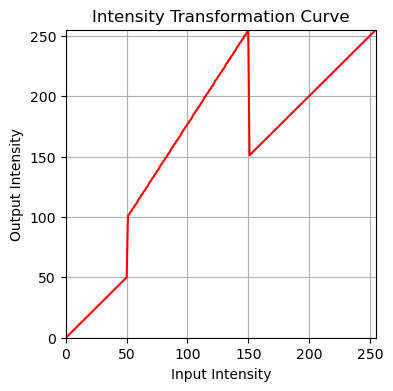

In [3]:
# Creating transformation
transform = np.concatenate((t1, t2, t3, t4, t5), axis=0).astype(np.uint8)

# plot the transformation
x = np.arange(256)

# Plotting
plt.figure(figsize=(4, 4))
plt.plot(x, transform, color='red')
plt.title("Intensity Transformation Curve")
plt.xlabel("Input Intensity")
plt.ylabel("Output Intensity")
plt.grid(True)
plt.xlim([0, 255])
plt.ylim([0, 255])
plt.show()

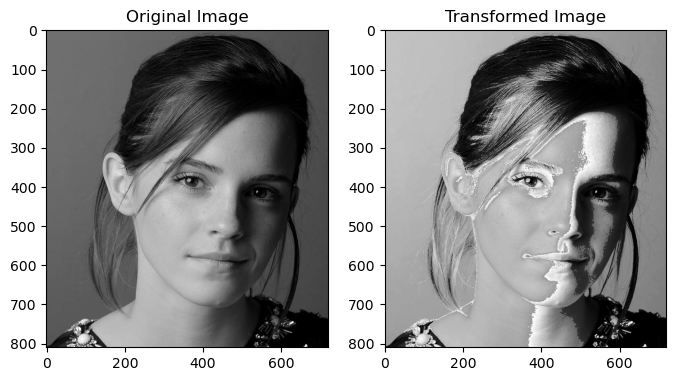

In [7]:
# Transform the image
img_1 = cv2.imread('a1images/emma.jpg', cv2.IMREAD_GRAYSCALE)

img_transformed = cv2.LUT(img_1, transform)

fig, ax = plt.subplots(1, 2, figsize=(8, 8))
ax[0].imshow(img_1, cmap='gray', vmin=0, vmax=255)
ax[0].set_title('Original Image')
ax[1].imshow(img_transformed, cmap='gray', vmin=0, vmax=255)
ax[1].set_title('Transformed Image')
plt.show()

## Question 2

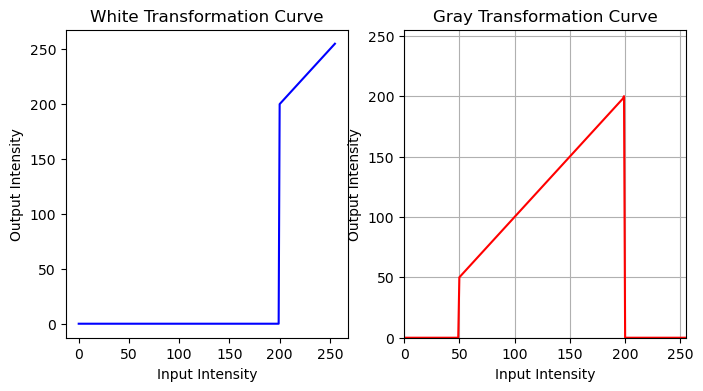

In [41]:
# Creating transformations

white_t = np.linspace(200, 255, 56).astype(np.uint8)
white_t = np.concatenate((np.zeros(200, dtype=np.uint8), white_t), axis=0).astype(np.uint8)

gray_t = np.linspace(50, 200, 150).astype(np.uint8)
gray_t = np.concatenate((np.zeros(50, dtype=np.uint8),gray_t, np.zeros(56, dtype=np.uint8)), axis=0).astype(np.uint8)

# plot the transformation
x = np.arange(256)

# Plotting white and grey transformations curves
fig, ax = plt.subplots(1, 2, figsize=(8, 4))
ax[0].plot(x, white_t, color='blue')
ax[0].set_title("White Transformation Curve")
ax[0].set_xlabel("Input Intensity")
ax[0].set_ylabel("Output Intensity")

ax[1].plot(x, gray_t, color='red')
ax[1].set_title("Gray Transformation Curve")
ax[1].set_xlabel("Input Intensity")
ax[1].set_ylabel("Output Intensity")
plt.grid(True)
plt.xlim([0, 255])
plt.ylim([0, 255])
plt.show()


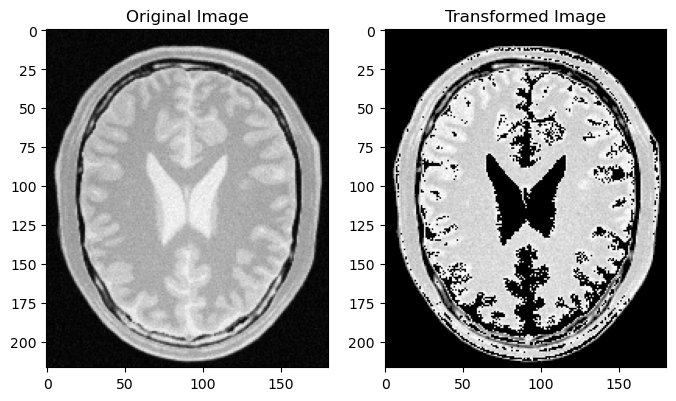

In [37]:
img2 = cv2.imread('a1images/brain_proton_density_slice.png', cv2.IMREAD_GRAYSCALE)

gray_transformed = cv2.LUT(img2, gray_t)

fig, ax = plt.subplots(1, 2, figsize=(8, 8))
ax[0].imshow(img2, cmap='gray')
ax[0].set_title('Original Image')
ax[1].imshow(gray_transformed, cmap='gray')
ax[1].set_title('Transformed Image')
plt.show()

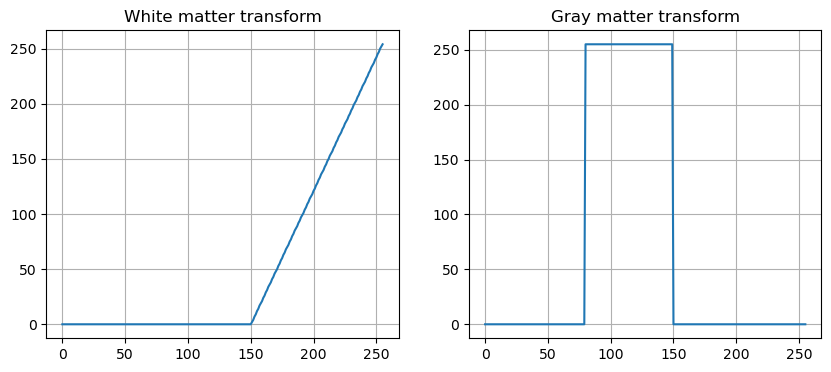

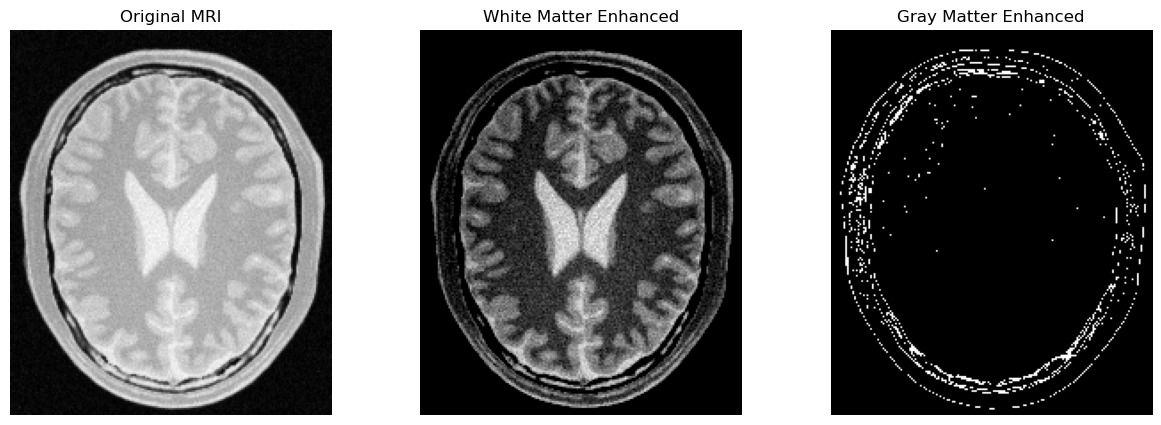

In [42]:
# Load brain image in grayscale
brain = cv2.imread('a1images/brain_proton_density_slice.png', cv2.IMREAD_GRAYSCALE)
if brain is None:
    raise FileNotFoundError("Check the image path for brain.jpg")

# --- White matter enhancement ---
white_transform = np.arange(256, dtype=np.uint8)
white_transform[:150] = 0  # suppress darker values
white_transform[150:] = np.clip((white_transform[150:] - 150) * (255/(255-150)), 0, 255)

white_enhanced = cv2.LUT(brain, white_transform)

# --- Gray matter enhancement ---
gray_transform = np.zeros(256, dtype=np.uint8)
gray_transform[80:150] = np.clip((gray_transform[80:150] - 80) * (255/(150-80)), 0, 255)

gray_enhanced = cv2.LUT(brain, gray_transform)

# Plot transformations
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(np.arange(256), white_transform)
plt.title("White matter transform")
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(np.arange(256), gray_transform)
plt.title("Gray matter transform")
plt.grid(True)
plt.show()

# Show results
fig, ax = plt.subplots(1, 3, figsize=(15,5))
ax[0].imshow(brain, cmap='gray')
ax[0].set_title("Original MRI")
ax[0].axis("off")

ax[1].imshow(white_enhanced, cmap='gray')
ax[1].set_title("White Matter Enhanced")
ax[1].axis("off")

ax[2].imshow(gray_enhanced, cmap='gray')
ax[2].set_title("Gray Matter Enhanced")
ax[2].axis("off")
plt.show()
